In [66]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [70]:
def get_FPR(FP,TN):
    return FP / float(FP + TN)
def get_TPR(TP,FN):
    return TP/ float(TP + FN)
def get_FPR_TPR_arr(threshold_step=0.01,flip_prediction=False):
    fpr_arr, tpr_arr = [], []
    threshold_arr = np.arange(0,1,threshold_step)
    for threshold in threshold_arr:
        pred_list = [1 if x >= threshold else 0 for x in model_pred]
        if flip_prediction:
            pred_list = [0 if x == 1 else 1 for x in pred_list]
        pred_actual_comparison = zip(pred_list,actual_pred)
        TP,FP,FN,TN = 0,0,0,0
        for pred,actual in pred_actual_comparison:
            if actual == 1 and pred == 1:
                TP += 1
            elif actual == 0 and pred == 1:
                FP += 1
            elif actual == 1 and pred == 0:
                FN += 1
            else:
                TN += 1
        fpr_arr.append(get_FPR(FP,TN))
        tpr_arr.append(get_TPR(TP,FN))
    return fpr_arr,tpr_arr

def get_auc(fpr_arr,tpr_arr):
    width_of_rectangle = 1 / len(fpr_arr)
    sum_rectangle = 0
    for i in range(len(fpr_arr)):
        sum_rectangle += tpr[i]*width_of_rectangle
    return sum_rectangle      

In [69]:
model_pred = []
for i in range(100):
    model_pred.append(np.random.random())
actual_pred = [1,1,1,1,1,1,0,0,0,0,0,0,
               1,1,1,1,1,1,0,0,0,0,0,0,
               1,1,1,1,1,1,0,0,0,0,0,0,
               1,1,1,1,1,1,0,0,0,0,0,0,
               1,1,1,1,1,1,0,0,0,0,0,0,
               1,1,1,1,1,1,0,0,0,0,0,0,
               1,1,1,1,1,1,0,0,0,0,0,0,
               1,1,1,1,1,1,0,0,0,0,0,0,
               1,1,1,1,1,1,0,0,0,0,0,0,
               1,1,1,1,1,1,0,0,0,0,0,0]

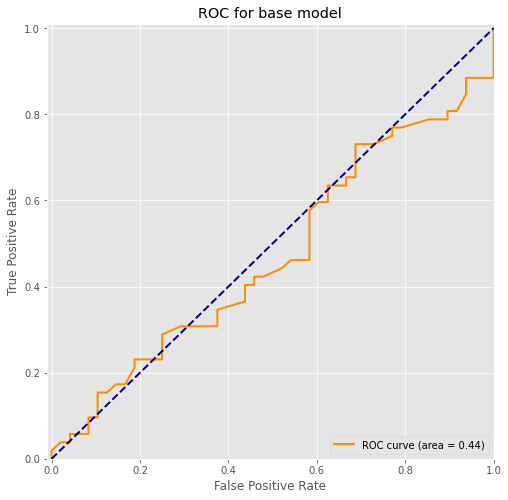

In [68]:
fpr_arr,tpr_arr = get_FPR_TPR_arr(threshold_step=0.01)
auc = get_auc(fpr_arr,tpr_arr)
plt.figure(figsize=[8,8])
lw = 2
plt.plot(fpr_arr, tpr_arr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for base model')
plt.legend(loc = "lower right")
plt.show()

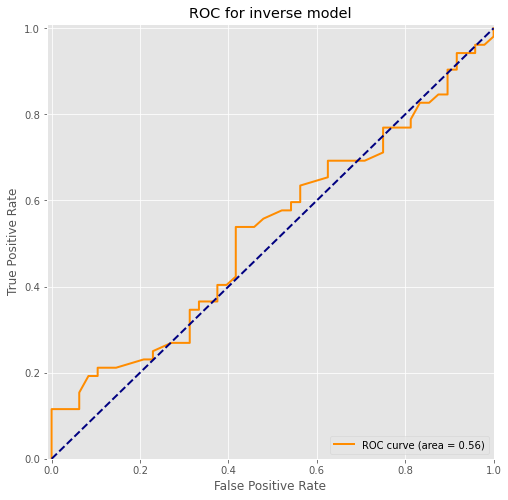

In [67]:
fpr_arr,tpr_arr = get_FPR_TPR_arr(threshold_step=0.01,flip_prediction=True)
auc = get_auc(fpr_arr,tpr_arr)
lw = 2
plt.figure(figsize=[8,8])
plt.plot(fpr_arr, tpr_arr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for inverse model')
plt.legend(loc = "lower right")
plt.show()